In [137]:
import matplotlib.pyplot as plt
import scipy.stats as sps
import numpy as np
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
import pydotplus 
from IPython.display import Image
from sklearn import tree

from sklearn.datasets import load_iris, load_digits, load_breast_cancer, load_boston
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.base import BaseEstimator
import matplotlib.pyplot as plt
import collections
import numpy as np

import scipy.stats as sps
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_distances

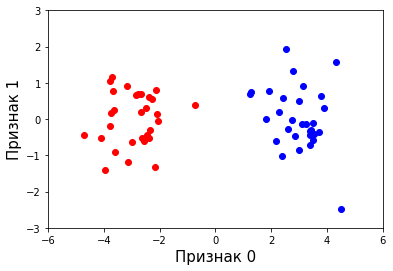

In [16]:
while True:
    X1 = sps.multivariate_normal(mean = [-3, 0]).rvs(size=30)
    X2 = sps.multivariate_normal(mean = [+3, 0]).rvs(size=30)
    if (X1[:, 0].max() < X2[:, 0].min()):
        break
    else:
        print("fail")
plt.xlim((-6, +6))
plt.ylim((-3, +3))
plt.scatter(X1[:, 0], X1[:, 1], color="red")
plt.scatter(X2[:, 0], X2[:, 1], color="blue")
plt.xlabel("Признак 0", fontsize=15)
plt.ylabel("Признак 1", fontsize=15)
plt.savefig("tree_one_feature_separable.png", dpi=1200)
plt.show()

In [10]:
def classify(X):
    if X[0] < 0:
        return "red"
    else:
        return "blue"

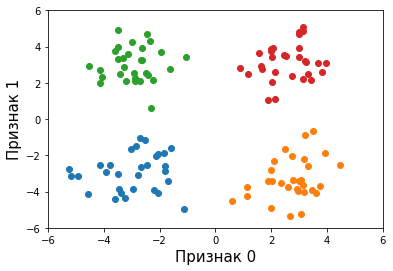

In [20]:

X1 = sps.multivariate_normal(mean = [-3,-3]).rvs(size=30)
X2 = sps.multivariate_normal(mean = [+3,-3]).rvs(size=30)
X3 = sps.multivariate_normal(mean = [-3,+3]).rvs(size=30)
X4 = sps.multivariate_normal(mean = [+3,+3]).rvs(size=30)

plt.xlim((-6, +6))
plt.ylim((-6, +6))
plt.scatter(X1[:, 0], X1[:, 1])
plt.scatter(X2[:, 0], X2[:, 1])
plt.scatter(X3[:, 0], X3[:, 1])
plt.scatter(X4[:, 0], X4[:, 1])
plt.xlabel("Признак 0", fontsize=15)
plt.ylabel("Признак 1", fontsize=15)
plt.savefig("tree_two_features_separable.png", dpi=1200)
plt.show()

In [21]:
def classify(X):
    if X[0] < 0:
        if X[1] < 0:
            return "blue"
        else:
            return "green"
    else:
        if X[1] > 0:
            return "red"
        else:
            return "orange"

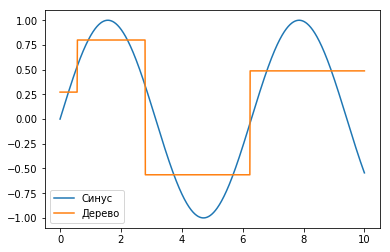

In [36]:

grid = np.linspace(0, 10, 1000)

dtr = DecisionTreeRegressor(max_depth = 2)
dtr.fit(grid.reshape(-1, 1), np.sin(grid).reshape(-1, 1))
dot_data = tree.export_graphviz(dtr, out_file="small_tree.out",   
                         filled=True, rounded=True,  
                         special_characters=True)  


plt.plot(grid, np.sin(grid), label="Синус")
plt.plot(grid, dtr.predict(grid.reshape(-1, 1)), label="Дерево")
plt.legend()

plt.savefig("tree_sinus.png", dpi=1200)
plt.show()

In [41]:
graph = pydotplus.graphviz.graph_from_dot_file("small_tree.out")  
png = graph.create_png()
Image(png)
with open("tree_sinus_tree.png","wb") as f:
    f.write(png)

In [112]:
data = load_iris()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.6, random_state=17)

NameError: name 'load_digits' is not defined

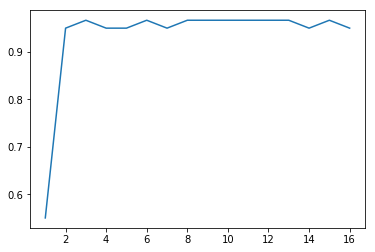

In [111]:
grid = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16]
res = []
for d in grid:
    clf = DecisionTreeClassifier(max_depth=d)
    clf.fit(X_train, y_train)
    res.append(accuracy_score(y_test, clf.predict(X_test)))
    
plt.plot(grid, res)

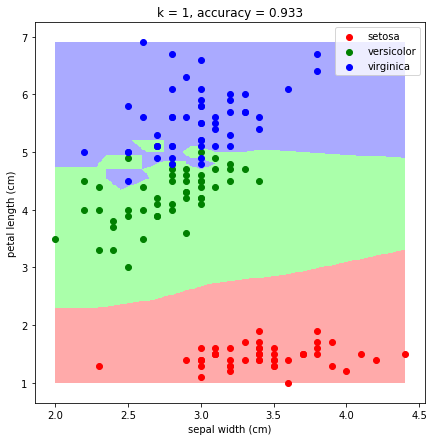

In [45]:
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.figure(figsize=(7, 7))
k = 1

h = 400
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), h),
    np.linspace(X[:, 1].min(), X[:, 1].max(), h)
)

X_grid = np.c_[xx.ravel(), yy.ravel()]

clf = KNeighborsClassifier(n_neighbors = k)
clf.fit(X_train, y_train)
Z = clf.predict(X_grid)
acc = accuracy_score(y_test, clf.predict(X_test))

plt.title("k = {}, accuracy = {}".format(k, round(acc, 3)))
zz = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap=cmap)
plt.xlabel(data["feature_names"][1])
plt.ylabel(data["feature_names"][2])
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=["red", "green", "blue"][i], label=data["target_names"][i])
plt.legend()

plt.show()

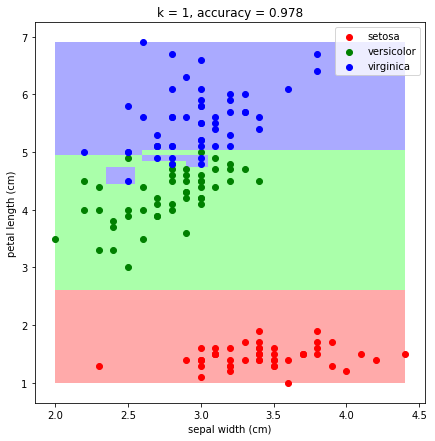

In [48]:
cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
plt.figure(figsize=(7, 7))
k = 1

h = 400
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), h),
    np.linspace(X[:, 1].min(), X[:, 1].max(), h)
)

X_grid = np.c_[xx.ravel(), yy.ravel()]

clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)
Z = clf.predict(X_grid)
acc = accuracy_score(y_test, clf.predict(X_test))

plt.title("k = {}, accuracy = {}".format(k, round(acc, 3)))
zz = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap=cmap)
plt.xlabel(data["feature_names"][1])
plt.ylabel(data["feature_names"][2])
for i in range(3):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=["red", "green", "blue"][i], label=data["target_names"][i])
plt.legend()

plt.show()

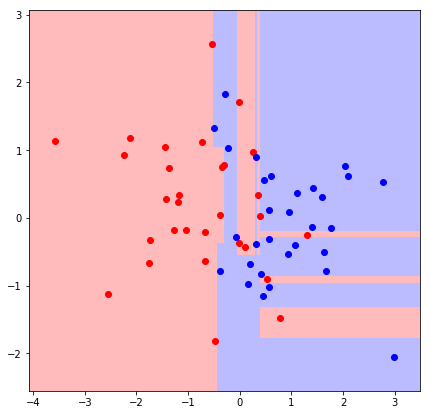

In [98]:
cmap = ListedColormap(['#FFBBBB', '#BBFFBB', '#BBBBFF'])
plt.figure(figsize=(7, 7))
k = 1

X1 = sps.multivariate_normal(mean = [-1, 0]).rvs(size=30)
X2 = sps.multivariate_normal(mean = [+1, 0]).rvs(size=30)
X = np.concatenate([X1, X2])

y = np.concatenate([np.zeros(30), np.ones(30)])

h = 400
xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min()-0.5, X[:, 0].max()+0.5, h),
    np.linspace(X[:, 1].min()-0.5, X[:, 1].max()+0.5, h)
)

X_grid = np.c_[xx.ravel(), yy.ravel()]

clf = DecisionTreeClassifier()
clf.fit(X, y)
Z = clf.predict(X_grid)
zz = np.array(Z).reshape(xx.shape)
plt.pcolormesh(xx, yy, zz, cmap=cmap)
for i in range(2):
    plt.scatter(X[y == i, 0], X[y == i, 1], color=(["red", "blue"])[i])
plt.savefig("tree_colormesh_2.png", dpi=1200)
plt.show()

In [141]:
data = load_boston()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.7, random_state=17)

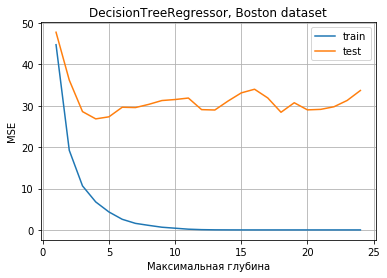

In [147]:
grid = np.arange(1, 25)
res = []
res_train = []
for d in grid:
    clf = DecisionTreeRegressor(max_depth=d)
    clf.fit(X_train, y_train)
    res.append(mean_squared_error(y_test, clf.predict(X_test)))
    res_train.append(mean_squared_error(y_train, clf.predict(X_train)))
plt.title("DecisionTreeRegressor, Boston dataset")
plt.plot(grid, res_train, label="train")
plt.plot(grid, res, label="test")
plt.xlabel("Максимальная глубина")
plt.ylabel("MSE")
plt.legend()
plt.grid()
plt.savefig("tree_overfitting.png", dpi=1200)
plt.show()


In [135]:
X_train.shape

(151, 13)